In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X=pd.read_csv('Training Data/Linear_X_Train.csv')
Y=pd.read_csv('Training Data/Linear_Y_Train.csv')

In [7]:
pd.DataFrame(X).describe()

,x
count,3750.000000
mean,-0.037795
std,0.992212
min,-3.546299
25%,-0.698443
50%,-0.035028
75%,0.629425
max,4.091393


In [3]:

# converting to numpy array 
x=X.values
y=Y.values

AttributeError: 'numpy.ndarray' object has no attribute 'desribe'

In [4]:
# for normalization  
u=x.mean()
std=x.std()
x=(x-u)/std

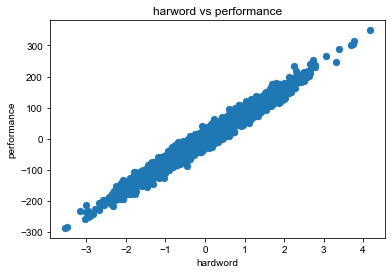

In [5]:
plt.title('harword vs performance')
plt.style.use('seaborn')
plt.xlabel('hardword')
plt.ylabel('performance')
plt.scatter(x,y)
plt.show()

### linear Regression

In [57]:
def hypothesis(X,theta):
    y_=theta[0]+theta[1]*X;
    return y_


def gradient(X,Y,theta):
    
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,theta)
        
        
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    return grad/m
    
def error(X,Y,theta):    
    totalerror=0.0
    m=X.shape[0]
    for i in range(X.shape[0]):
        y_=hypothesis(X[i],theta)
        totalerror+= (Y[i]-y_)**2
    return totalerror/m
    
    
    
def gradientDescent(X,Y,learningRate=0.1,maxipos=50):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range (maxipos):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learningRate*grad[0]
        theta[1]=theta[1]-learningRate*grad[1]
        
        
    return error_list,theta,theta_list


    
        
    

In [58]:
error_list,theta,theta_list=gradientDescent(x,y)

In [61]:
theta

array([ 0.68034446, 79.49392074])

In [59]:
theta_list

[(0.0, 0.0),
 (0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293

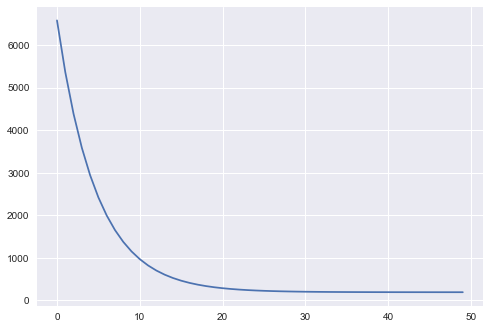

In [60]:
plt.plot(error_list)

### predictions and best line

In [63]:
y_=hypothesis(x,theta)
# due to typecassting it gives numpy array

In [64]:
y_

array([[-19.47300242],
       [-43.47167405],
       [ 86.04143787],
       ...,
       [-20.74353955],
       [137.99079963],
       [-35.69500857]])

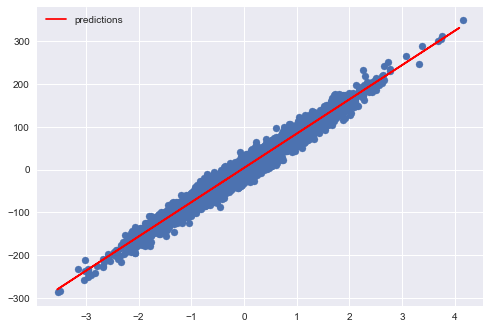

In [70]:
# on training data
plt.scatter(x,y)
plt.plot(X,y_,color="red",label="predictions")
plt.legend()


In [75]:
# on testing data
x_test=pd.read_csv("Test Cases/Linear_X_Test.csv")
x_test=x_test.values

In [76]:
ytest_=hypothesis(x_test,theta)


In [81]:

df=pd.DataFrame(data=ytest_,columns=["y"])

In [84]:
df.to_csv('y_testprediction.csv',index=False)

## section 3- computing the score

r2 or r squared or coefficient of determination

In [86]:
def r2score(Y,Y_):
    num=np.sum((Y-Y_)**2)
    den=np.sum((Y-Y.mean())**2)
    
    score=1-(num/den)
    return score*100

In [87]:
r2score(y,y_)

97.09354314048299